# 物理学研究ゼミナール 「現象を数理モデル化する」

山崎研究室 修士2年 藤本將太郎

![QR code to nbviewer](./img/butsuzemi2016_160426ipnb.png)

# 課題内容

* **ロジスティック写像**について，そのモデルの背景と構造を理解する
* 実際に数値シミュレーションを行い，いろいろなパラメータに対する時系列データをプロットする
* パラメータによる挙動の変化を観察し，**カオス**に対する理解を深める

# モデルの背景

生物の個体数の時間発展を記述するモデルを考える．

世代交代がある決まった季節に起こるなど，その変化は離散的であると見なせるため，微分方程式よりもむしろ差分方程式の方が適している．

第$n$世代での個体数$P_{n}$として第$n+1$世代の個体数が成長率$\alpha$(定数)で変化するとして

$$ P_{n+1} = \alpha P_{n}.$$

$\alpha > 1$のとき個体数は等比級数的に無限大に発散し，$\alpha < 1$のときは0に収束する

$\Rightarrow$このモデルは現象を適切に表したモデルとは言えない．

そこで次に個体数が増加するにつれて成長率が線形に減少する場合

$$ P_{n+1} = P_{n}(a - bP_{n}) $$

を考える．

このときこの式は$P_{n}$の2乗を含んでいるので，非線形の方程式となる

* $P_{n} = (a/b)x_{n}$とおく

$$ x_{n+1} = ax_{n}(1 - x_{n}) $$

* $r=a/4$を導入

$$ x_{n+1} = f(x_{n}) = 4r x_{n}(1 - x_{n}) .$$

$x_{n} > 1$の時$x_{n}$は負になるので，以降では$0 \le x_{n} \le 1$とする．

この漸化式を，パラメータ$r\in (0, 1)$を様々に変えながらプロットし，その時間発展を見る．


(実際の現象との対応: 繁殖率と，個体数が増えることによる繁殖率の低下率との兼ね合いで，将来その種がどのような個体数変動をするかを予測する)

# シミュレーションの実際

1. 漸化式$x_{n+1} = 4r x_{n}(1-x_{n})$をエクセル上で$r$の値を様々に変えながら計算し，
それぞれの代表的な場合についてその時系列データをプロット，振る舞いの概要を理解する  
(具体的には以下を確認する)
    * $r$の値が小さいときには$x=0$が安定な固定点，$r > 0.25$では不安定な固定点
    * $0.25 < r < 0.75$について，すべての軌跡が$1 - 1/4r$に近づくこと
    * $r > 0.75$について，長時間後の振る舞いがカオス的
2. 長時間後($n_{\mathrm{long}}$)の振る舞いを調べるために，  
横軸$r_{k} \in (0.7 , 1.0],\ k \in \mathbb{N}$，  
縦軸$x_{k} (k \in [n_\mathrm{{long}}, n_{\mathrm{max}}])$  
としてプロットを行う．得られたグラフから何が読み取れるか．

# 考察項目

カオスの一般的な概念の理解  

* カオスの定義
* アトラクター
* 固定点
* リミットサイクル
* (リアプノフ指数(Lyapunov exponent))

# Demo

プログラミング言語(`Python`)を用いたシミュレーションで時間発展の様子を見てみる

In [5]:
%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (10, 6)
from ipywidgets import interact

def mapping(x0=0.6, r=0.745, nmax=100):
    x = [x0]
    for i in range(nmax):
        t = 4.0 * r * x[i] * (1 - x[i])
        x.append(t)
    n = range(nmax + 1)
    plt.plot(n, x, label='$x_{0}\ =' + str(x0) + ' : '
             + 'r\ =' + str(r) + ' : '
             + 'n_{\mathrm{max}}\ =' + str(nmax) + '$')
    if r > 0.25 and r < 0.75:
        xfi = 1. - 1. / (4. * r)
        plt.plot([0, nmax], [xfi] * 2,
             label=r'$x = 1 - 1 / 4r = ' + str(xfi) + '$'
             )
    plt.gca().set_xlim(0, nmax)
    plt.gca().set_ylim(-0.05, 1.0)
    plt.xlabel('$n$')
    plt.ylabel('$x$')
    plt.title('Iterate map')
    plt.legend(loc="best")
    plt.show()
    

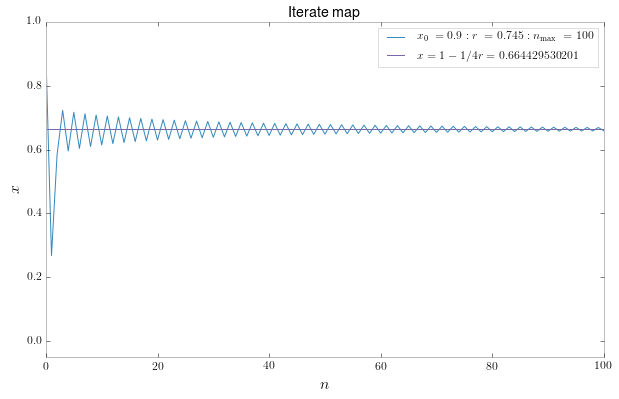

In [6]:
interact(mapping, x0=(0., 1., 0.05), r=(0. , 1., 0.001), nmax=(50, 500, 50));

# 周期倍化，カオスの発現

パラメータ$r$の値によって，長時間後の振る舞いがどう変わるか?

| パラメータ                   | 値                                |
| ---                          | ---                               |
| $r$                          | $r \in [0.7, 1.0]$ ($0.0005$刻み) |
| 初期条件                     | $x_{0} = 0.3$                     |
| プロットまでに無視する世代数 | $1000$                            |
| 各$r$でプロットする点の数    | $50$                              |

In [3]:
import numpy as np

def bifurcate(x0, ntransient, nplot, r0, rmax, dr):
    global x
    count = int((rmax - r0) / dr)
    fig = [_Plot(r0 + dr * n, x0, ntransient, nplot) for n in range(count + 1)]
    plt.gca().set_xlim(r0, rmax)
    plt.gca().set_ylim(np.min(x), np.max(x))
    plt.xlabel('$r$')
    plt.ylabel('$x$')
    plt.title('Bifurcation Diagram')
    plt.show()

def _Plot(r, x0, ntransient, nplot):
    global x

    def logistic(x_i, r):
        return 4.0 * r * x_i * (1.0 - x_i)

    n = ntransient + nplot * 2
    x = [x0]
    for i in np.arange(n):
        x.append(logistic(x[i], r))
    x = np.array(x)
    plt.scatter([r] * nplot, x[ntransient + 1:ntransient + nplot + 1],
                color='r', s=0.1, marker='.'
               )
    plt.scatter([r] * nplot, x[ntransient + nplot + 1:n + 1],
                color='b', s=0.1, marker='.'
               )

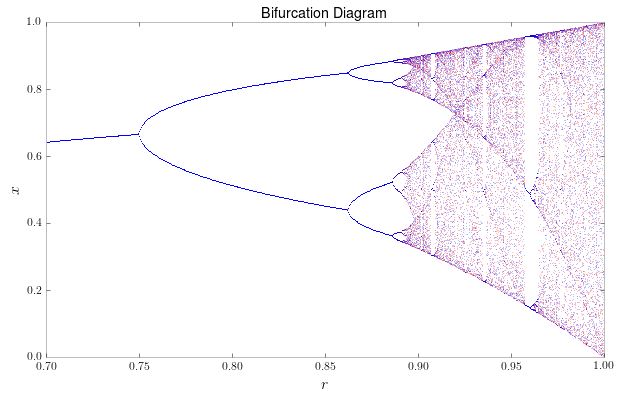

In [4]:
parameters = {'x0': 0.3,
              'ntransient': 1000,
              'nplot': 50,
              'r0': 0.7,
              'rmax': 1.,
              'dr': 0.0005}

bifurcate(**parameters)